In [1]:
# sime series prediction...

In [30]:
! rm -f international-airline-passengers.csv
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv -O international-airline-passengers.csv

--2018-02-08 06:29:14--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2334 (2.3K) [text/plain]
Saving to: ‘international-airline-passengers.csv’

100%[======================================>] 2,334       --.-K/s   in 0s      

2018-02-08 06:29:14 (17.4 MB/s) - ‘international-airline-passengers.csv’ saved [2334/2334]



In [10]:
# The code was removed by DSX for sharing.

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


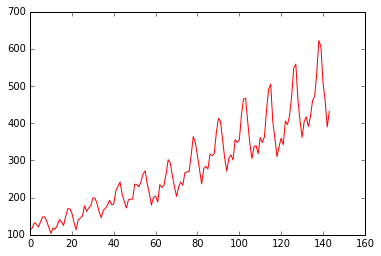

In [31]:
from pandas import read_csv
import matplotlib.pyplot as plt
dataset = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [32]:
# ML Preceptron
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [33]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [34]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [40]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [41]:
#look back which is the number of previous time steps to use as input variables to predict the next time period
# X holds the number of passengers at T and Y at T+1


In [42]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 47574.0310
Epoch 2/200
0s - loss: 41641.6842
Epoch 3/200
0s - loss: 35674.6459
Epoch 4/200
0s - loss: 29458.9143
Epoch 5/200
0s - loss: 23370.1465
Epoch 6/200
0s - loss: 17670.4742
Epoch 7/200
0s - loss: 12727.3853
Epoch 8/200
0s - loss: 8637.8683
Epoch 9/200
0s - loss: 5552.0880
Epoch 10/200
0s - loss: 3408.6351
Epoch 11/200
0s - loss: 2051.4107
Epoch 12/200
0s - loss: 1280.3600
Epoch 13/200
0s - loss: 862.2268
Epoch 14/200
0s - loss: 672.6801
Epoch 15/200
0s - loss: 584.1897
Epoch 16/200
0s - loss: 554.7285
Epoch 17/200
0s - loss: 546.6079
Epoch 18/200
0s - loss: 547.3611
Epoch 19/200
0s - loss: 538.8213
Epoch 20/200
0s - loss: 538.5308
Epoch 21/200
0s - loss: 536.9808
Epoch 22/200
0s - loss: 536.0284
Epoch 23/200
0s - loss: 537.1251
Epoch 24/200
0s - loss: 535.7832
Epoch 25/200
0s - loss: 538.2117
Epoch 26/200
0s - loss: 538.4747
Epoch 27/200
0s - loss: 538.2313
Epoch 28/200
0s - loss: 537.3816
Epoch 29/200
0s - loss: 538.2827
Epoch 30/200
0s - loss: 539.0565


In [43]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


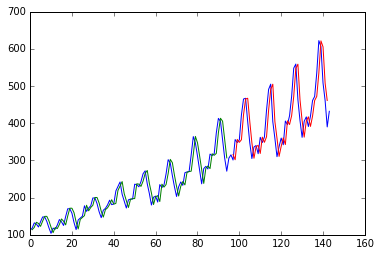

In [45]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset) #Return a new array with the same shape and type as a given array
trainPredictPlot[:, :] = numpy.nan # fill with NaN
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 #columns from 1[look_back value] to length of array + lookback all rows...
    #shifting everyting by 1: or look back value

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# same as above... accounting for shift


# plot baseline and predictions
plt.plot(dataset) # blue
plt.plot(trainPredictPlot) # green
plt.plot(testPredictPlot)# red
plt.show()

In [47]:

#It basically predicted the same input value as the output.. vhich is bad..
#Plot looks good
# did all the shifting to see the plot.. 

#MLP with a window
#multiple recent time steps can be used to make the prediction for the next time step  
112 118 132 129  
118 132 129 121  
132 129 121 135  
129 121 135 148  
121 135 148 148  

Epoch 1/400
0s - loss: 56220.9933
Epoch 2/400
0s - loss: 35460.9790
Epoch 3/400
0s - loss: 22866.1265
Epoch 4/400
0s - loss: 12194.7307
Epoch 5/400
0s - loss: 5334.2614
Epoch 6/400
0s - loss: 2149.6125
Epoch 7/400
0s - loss: 1239.3491
Epoch 8/400
0s - loss: 1095.3939
Epoch 9/400
0s - loss: 1072.8276
Epoch 10/400
0s - loss: 1063.4692
Epoch 11/400
0s - loss: 1049.5282
Epoch 12/400
0s - loss: 1057.5142
Epoch 13/400
0s - loss: 1052.5202
Epoch 14/400
0s - loss: 1047.0605
Epoch 15/400
0s - loss: 1045.5235
Epoch 16/400
0s - loss: 1037.6154
Epoch 17/400
0s - loss: 1044.7640
Epoch 18/400
0s - loss: 1042.3984
Epoch 19/400
0s - loss: 1078.3832
Epoch 20/400
0s - loss: 1047.0297
Epoch 21/400
0s - loss: 1031.6505
Epoch 22/400
0s - loss: 1044.9919
Epoch 23/400
0s - loss: 1059.3191
Epoch 24/400
0s - loss: 1018.5910
Epoch 25/400
0s - loss: 1012.2098
Epoch 26/400
0s - loss: 1017.1777
Epoch 27/400
0s - loss: 994.8612
Epoch 28/400
0s - loss: 1004.8780
Epoch 29/400
0s - loss: 985.6591
Epoch 30/400
0s - los

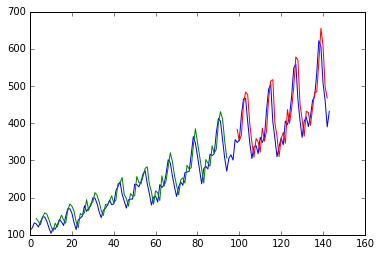

In [54]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

 

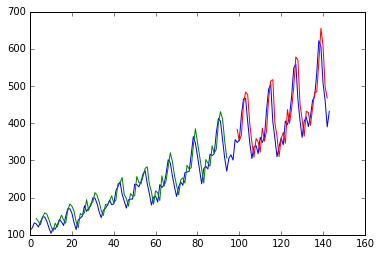

In [56]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()